In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
data = pd.read_csv('D:\Downloads\weight-height.csv')
print(data)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [5]:
data['Height'] = data['Height'].apply(lambda x:x*2.54)
data['Weight'] = data['Weight'].apply(lambda x:x/2.204623)
data.head(10)

,Gender,Height,Weight
0,Male,187.571423,109.721056
1,Male,174.706036,73.622779
2,Male,188.239668,96.497612
3,Male,182.196685,99.809568
4,Male,177.499761,93.598679
5,Male,170.822660,69.042261
6,Male,174.714106,83.428273
7,Male,173.605229,76.190401
8,Male,170.228132,79.800238
9,Male,161.179495,70.941688


c:\users\dxd\miniconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


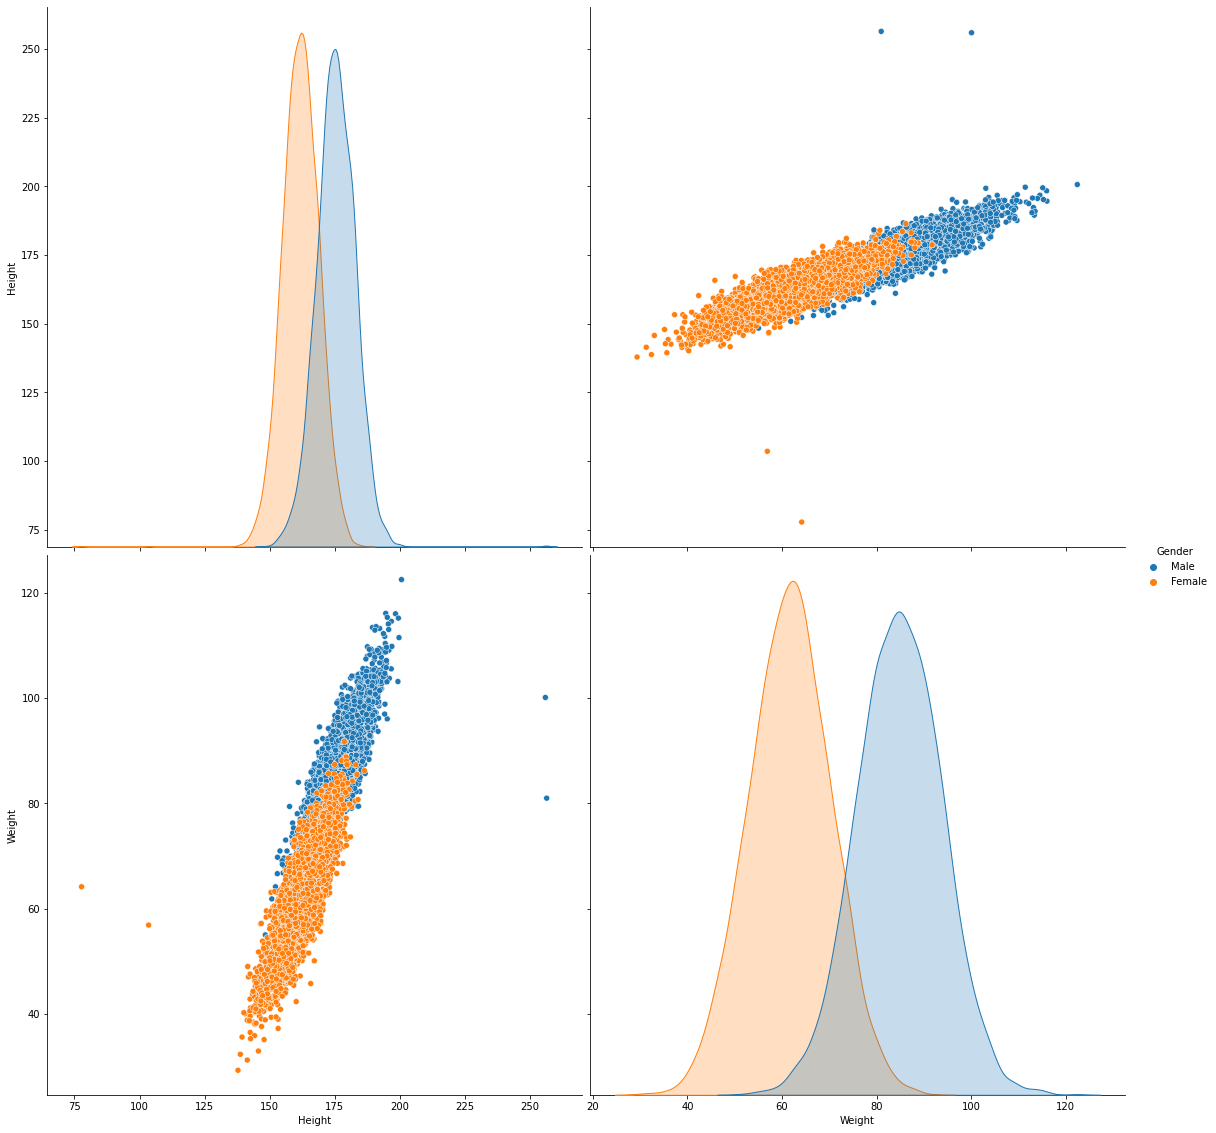

In [6]:
sns.pairplot(data,hue='Gender',size =8)

w1 dùng thư viện: [1.3440956]
w0 dùng thư viện: [-153.35195975]
R2 score dùng thư viện: 0.8366756438048346


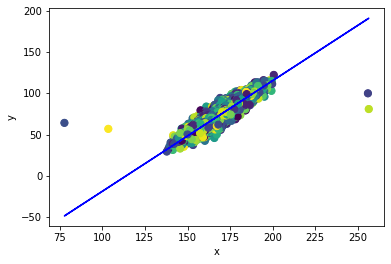

In [7]:
x=data['Height'].values.reshape(-1,1)
y=data['Weight'].values.reshape(-1,1)
n = np.size(x)
area = 50
colors = np.random.rand(n)
plt.scatter(x, y, area, colors, alpha=0.5)
#Tính w0, w1 bằng thư viện
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y)
print('w1 dùng thư viện:', reg.coef_[0])
print('w0 dùng thư viện:', reg.intercept_)
#Tính R2 bằng thư viện
y_pred = reg.intercept_+ reg.coef_[0]*x
from sklearn.metrics import r2_score
r2Score = r2_score(y, y_pred)
print('R2 score dùng thư viện:', r2Score)
plt.scatter(x, y, area, colors, marker = "o")
plt.plot(x, y_pred, color = "b")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [64]:
weight = data['Weight']
height = data['Height']

w1 = reg.coef_[0]
w0 = reg.intercept_

errPoint = abs(weight - w0 - w1*height)
data['ERROR'] = errPoint

errAverage = sum(data['ERROR']) / len(data['ERROR'])
healthyArea = errAverage * 5

nhieu = data[data['ERROR'] > healthyArea]
loaiBoNhieu = data[data['ERROR'] <= healthyArea]
print('Vùng bị nhiễu: \n', nhieu)
print('Loại bỏ nhiễu: \n', loaiBoNhieu)

Vùng bị nhiễu: 
       Gender      Height      Weight       ERROR
67      Male  255.944040  100.097859   89.276048
2862    Male  256.446957   80.989444  109.050934
7533  Female   77.719875   64.173162  110.983718
7675  Female  103.490868   56.902492   69.561068
7821  Female  165.768177   45.805065   24.066879
Loại bỏ nhiễu: 
       Gender      Height      Weight      ERROR
0       Male  187.571423  109.721056  10.955231
1       Male  174.706036   73.622779   8.093705
2       Male  188.239668   96.497612   3.153777
3       Male  182.196685   99.809568   8.166400
4       Male  177.499761   93.598679   8.179922
...      ...         ...         ...        ...
9995  Female  168.078536   62.041199  10.892456
9996  Female  170.350573   77.504365   1.559785
9997  Female  162.224700   58.275414   6.900678
9998  Female  175.346978   74.322214   8.243653
9999  Female  157.338385   51.550357   7.150340

[9995 rows x 4 columns]


In [63]:
train_set = data[0:round(len(loaiBoNhieu)/2*0.8)].append(data[round(len(loaiBoNhieu)/2):round(len(loaiBoNhieu)*0.8)])
test_set  = data[round(len(loaiBoNhieu)/2*0.8):round(len(loaiBoNhieu)/2)].append(data[round(len(loaiBoNhieu)*0.8):len(loaiBoNhieu)])
print('train_set: \n',train_set)
print('test_set: \n',test_set)

train_set: 
       Gender      Height      Weight      ERROR
0       Male  187.571423  109.721056  10.955231
1       Male  174.706036   73.622779   8.093705
2       Male  188.239668   96.497612   3.153777
3       Male  182.196685   99.809568   8.166400
4       Male  177.499761   93.598679   8.179922
...      ...         ...         ...        ...
7991  Female  159.545132   61.595944   0.029157
7992  Female  155.134416   59.573198   3.793223
7993  Female  156.390616   57.158308   0.286396
7994  Female  167.976817   69.669033   3.129823
7995  Female  147.689958   50.818337   4.903832

[6996 rows x 4 columns]
test_set: 
       Gender      Height     Weight      ERROR
3998    Male  177.476157  81.494640   3.892837
3999    Male  183.682996  92.527515   1.085327
4000    Male  174.401846  80.778366   0.535003
4001    Male  184.869902  91.096207   4.089536
4002    Male  174.327709  84.158616   2.943494
...      ...         ...        ...        ...
9990  Female  160.475926  64.077214   1.21861

In [62]:
x=train_set['Height'].values.reshape(-1,1)
y=train_set['Weight'].values.reshape(-1,1)

#Tính w0, w1 bằng thư viện
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y)
print('w1 dùng thư viện:', reg.coef_[0])
print('w0 dùng thư viện:', reg.intercept_)
#Tính R2 bằng thư viện
y_pred = reg.intercept_+ reg.coef_[0]*x
from sklearn.metrics import r2_score
r2Score = r2_score(y, y_pred)
print('R2 score dùng thư viện:', r2Score)

w1 dùng thư viện: [1.3252101]
w0 dùng thư viện: [-149.80571892]
R2 score dùng thư viện: 0.8279342004632015


In [61]:
x=test_set['Height'].values.reshape(-1,1)
y=test_set['Weight'].values.reshape(-1,1)
#Tính R2 bằng thư viện
y_pred = reg.intercept_+ reg.coef_[0]*x
from sklearn.metrics import r2_score
r2Score = r2_score(y, y_pred)
print('R2 score dùng thư viện:', r2Score)

R2 score dùng thư viện: 0.83934519830293


In [60]:
weight = 60
height = 170
w1 = reg.coef_[0]
w0 = reg.intercept_

errPoint = abs(weight - w0 - w1*height)

errAverage = sum(errPoint / len(errPoint))
healthyArea = errAverage * 5


if errPoint > healthyArea :
    print("K can doi")
else:
    print("Can doi")

Can doi
